Logistic Regression Accuracy: 1.00
Random Forest Accuracy: 0.96
SVM Accuracy: 0.98
Decision Tree Accuracy: 0.98


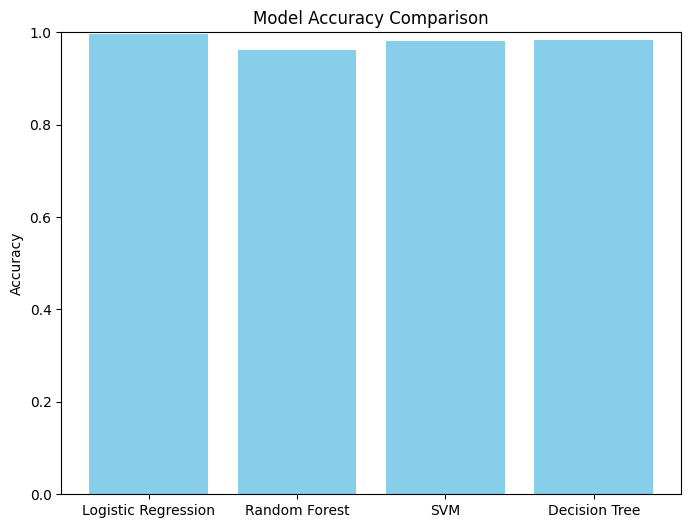

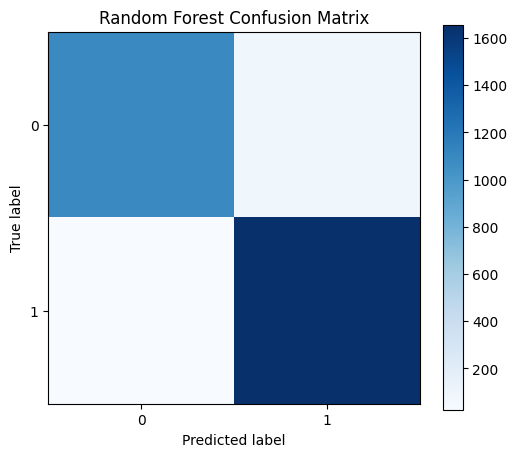

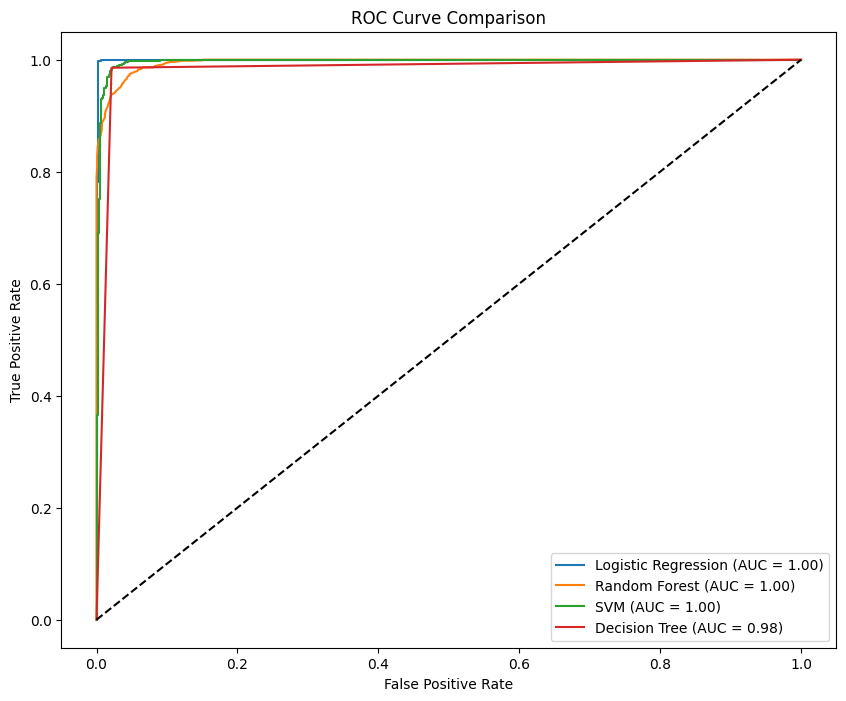

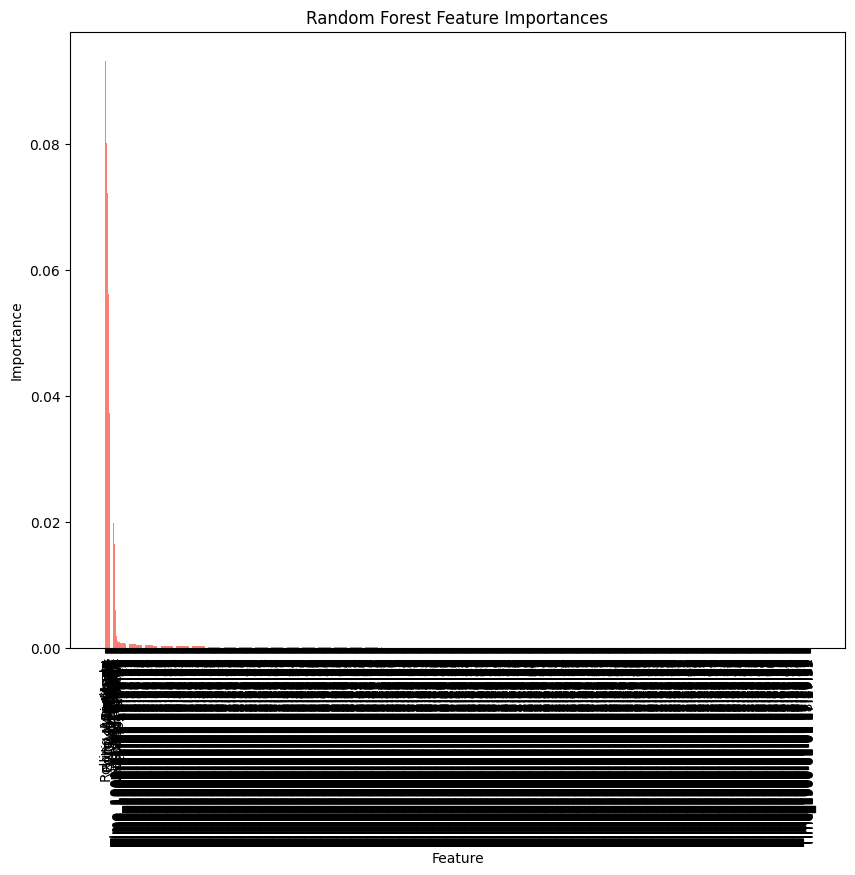

Logistic Regression Cross-Validation Accuracy: 0.76
Random Forest Cross-Validation Accuracy: 0.81


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load dataset
data = pd.read_csv('Featured_dataset.csv')

# Define features and target variable
X = data.drop(columns=['label'])
y = data['label']

# Convert categorical data and fill missing values
X = pd.get_dummies(X)
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit models and get predictions
models = [log_reg, rf, svm, dt]
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree']
accuracies = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"{model_names[models.index(model)]} Accuracy: {acc:.2f}")

# 1. Plot Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 2. Confusion Matrix for Random Forest
y_pred_rf = rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

# 3. ROC Curve and AUC for each model
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        probs = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 4. Feature Importances (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 8))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='salmon')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# 5. Cross-Validation
cv_accuracies = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_accuracies.append(scores.mean())
    print(f"{model_names[models.index(model)]} Cross-Validation Accuracy: {scores.mean():.2f}")

plt.figure(figsize=(8, 6))
plt.bar(model_names, cv_accuracies, color='teal')
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
